In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('primary-sub-energy-source.csv')

data = data[data['Year'] == 2019]
data = data[data['Entity'] == 'World']
data = data.drop(['Entity', 'Code', 'Year'], axis=1)

fossil_fuel = data['Coal Consumption - TWh'] + data['Oil Consumption - TWh'] + data['Gas Consumption - TWh']
nuclear = data['Nuclear Consumption - TWh']
renewables = data['Wind Consumption - TWh'] + data['Hydro Consumption - TWh'] + data['Solar Consumption - TWh'] + data['Biofuels Consumption - TWh - Total'] + data['Geo Biomass Other - TWh']
low_carbon = nuclear + renewables

perc_coal = data['Coal Consumption - TWh'] / (fossil_fuel + nuclear + renewables)
perc_oil = data['Oil Consumption - TWh'] / (fossil_fuel + nuclear + renewables)
perc_gas = data['Gas Consumption - TWh'] / (fossil_fuel + nuclear + renewables)

perc_wind = data['Wind Consumption - TWh'] / (fossil_fuel + nuclear + renewables)
perc_hydro = data['Hydro Consumption - TWh'] / (fossil_fuel + nuclear + renewables)
perc_solar = data['Solar Consumption - TWh'] / (fossil_fuel + nuclear + renewables)
perc_bio = data['Biofuels Consumption - TWh - Total'] / (fossil_fuel + nuclear + renewables)
perc_geo = data['Geo Biomass Other - TWh'] / (fossil_fuel + nuclear + renewables)

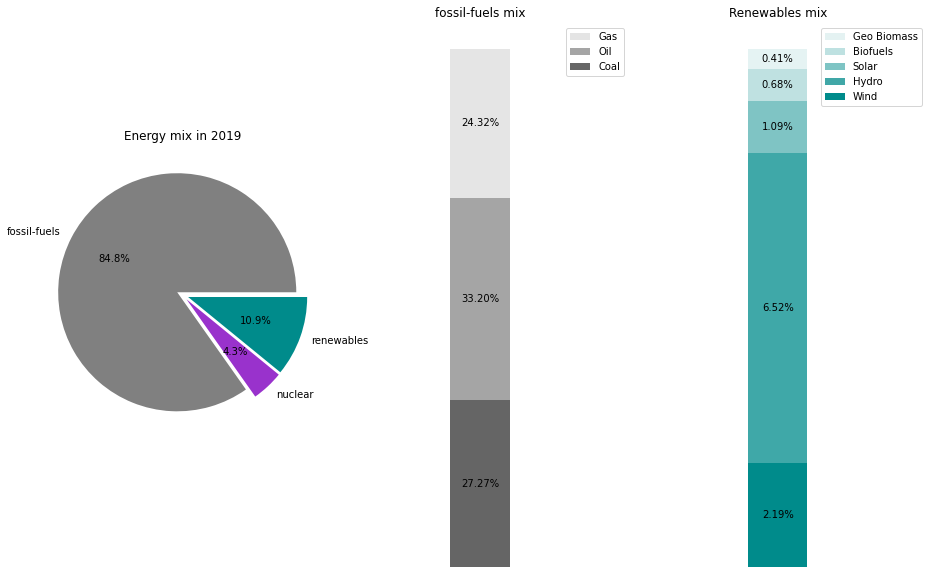

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 10))
fig.subplots_adjust(wspace=0)

# pie chart
overall_ratios = [fossil_fuel.values[0], nuclear.values[0], renewables.values[0]]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%',
                     labels=['fossil-fuels', 'nuclear', 'renewables'], 
                     explode=[0.05, 0.05, 0.05], 
                     colors=['gray', 'darkorchid', 'darkcyan'])

ax1.set_title('Energy mix in 2019')

# bar chart 1
ratios = [perc_coal.values[0], perc_oil.values[0], perc_gas.values[0]]
labels = ['Coal', 'Oil', 'Gas']
bottom = 1
width = .2

for j, (height, label) in enumerate(reversed([*zip(ratios, labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='black', label=label, alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.2%}"], label_type='center')

ax2.set_title('fossil-fuels mix')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# bar chart 2
ratios1 = [perc_wind.values[0], perc_hydro.values[0], perc_solar.values[0], perc_bio.values[0], perc_geo.values[0]]
labels1 = ['Wind', 'Hydro', 'Solar', 'Biofuels', 'Geo Biomass']
bottom = 1
width = .2

for j, (height, label) in enumerate(reversed([*zip(ratios1, labels1)])):
    bottom -= height
    if (j == 0):
        bc = ax3.bar(0, height, width, bottom=bottom, color='darkcyan', label=label, alpha=0.1 + j)
    else:
        bc = ax3.bar(0, height, width, bottom=bottom, color='darkcyan', label=label, alpha=0.25 * j)
    ax3.bar_label(bc, labels=[f"{height:.2%}"], label_type='center')

ax3.set_title('Renewables mix')
ax3.legend()
ax3.axis('off')
ax3.set_xlim(- 2.5 * width, 2.5 * width)

plt.savefig('Energy mix in 2019.jpg', dpi=300, bbox_inches='tight')
plt.show()